In [78]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt

In [32]:
data = 'https://raw.githubusercontent.com/107SBakst/107SBakst.github.io/main/data/Emission_city_density_dataset.csv'


In [40]:
dataset = pd.read_csv(data, encoding= 'unicode_escape',error_bad_lines=False)
df = pd.DataFrame(dataset)
df

,Urban_Cluster,Country,Population,Footprint (Mt CO2),1StdDev,Footprint_per_capita_(t CO2_cap),Error (plus minus),ClusterID,Global ranking,population_density_by_city_Entity,population_density_by_city_Code,population_density_by_city_Year,population_density_by_city_Population_density_by_city
0,Hong Kong SAR,China,6029000,NaN,37.8,34.6,6.3,13847,1,Hong Kong,HKG,2011.0,25700.0
1,Mohammed Bin Zayed City,UAE,188000,NaN,5.3,32.9,27.9,5292,2,NaN,NaN,NaN,NaN
2,Abu Dhabi,UAE,911000,NaN,15.6,32.9,17.1,5288,3,NaN,NaN,NaN,NaN
3,Country of Singapore,Singapore,5235000,NaN,34.1,30.8,6.5,13845,4,NaN,NaN,NaN,NaN
4,Hulun Buir,China,198000,NaN,6.4,30.0,32.3,10441,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,"Unknown city at lat/lon 34.0, 51.4",Iran,237000,NaN,1.6,8.8,6.6,5171,496,NaN,NaN,NaN,NaN
504,"Unknown city at lat/lon 35.4, 116.9",China,471000,NaN,2.7,8.8,5.8,11975,497,NaN,NaN,NaN,NaN
505,"Unknown city at lat/lon 51.6, 0.6",UK,250000,NaN,1.4,8.8,5.4,1836,498,NaN,NaN,NaN,NaN
506,"Unknown city at lat/lon 38.7, 116.1",China,197000,NaN,1.6,8.8,8.0,11253,499,NaN,NaN,NaN,NaN


In [69]:
df.Population_a = [df.Population > 0]
df.Population_density_a = [df.population_density_by_city_Population_density_by_city > 0]
df.emissions_per_capita = [df['Footprint_per_capita_(t CO2_cap)'] > 0]


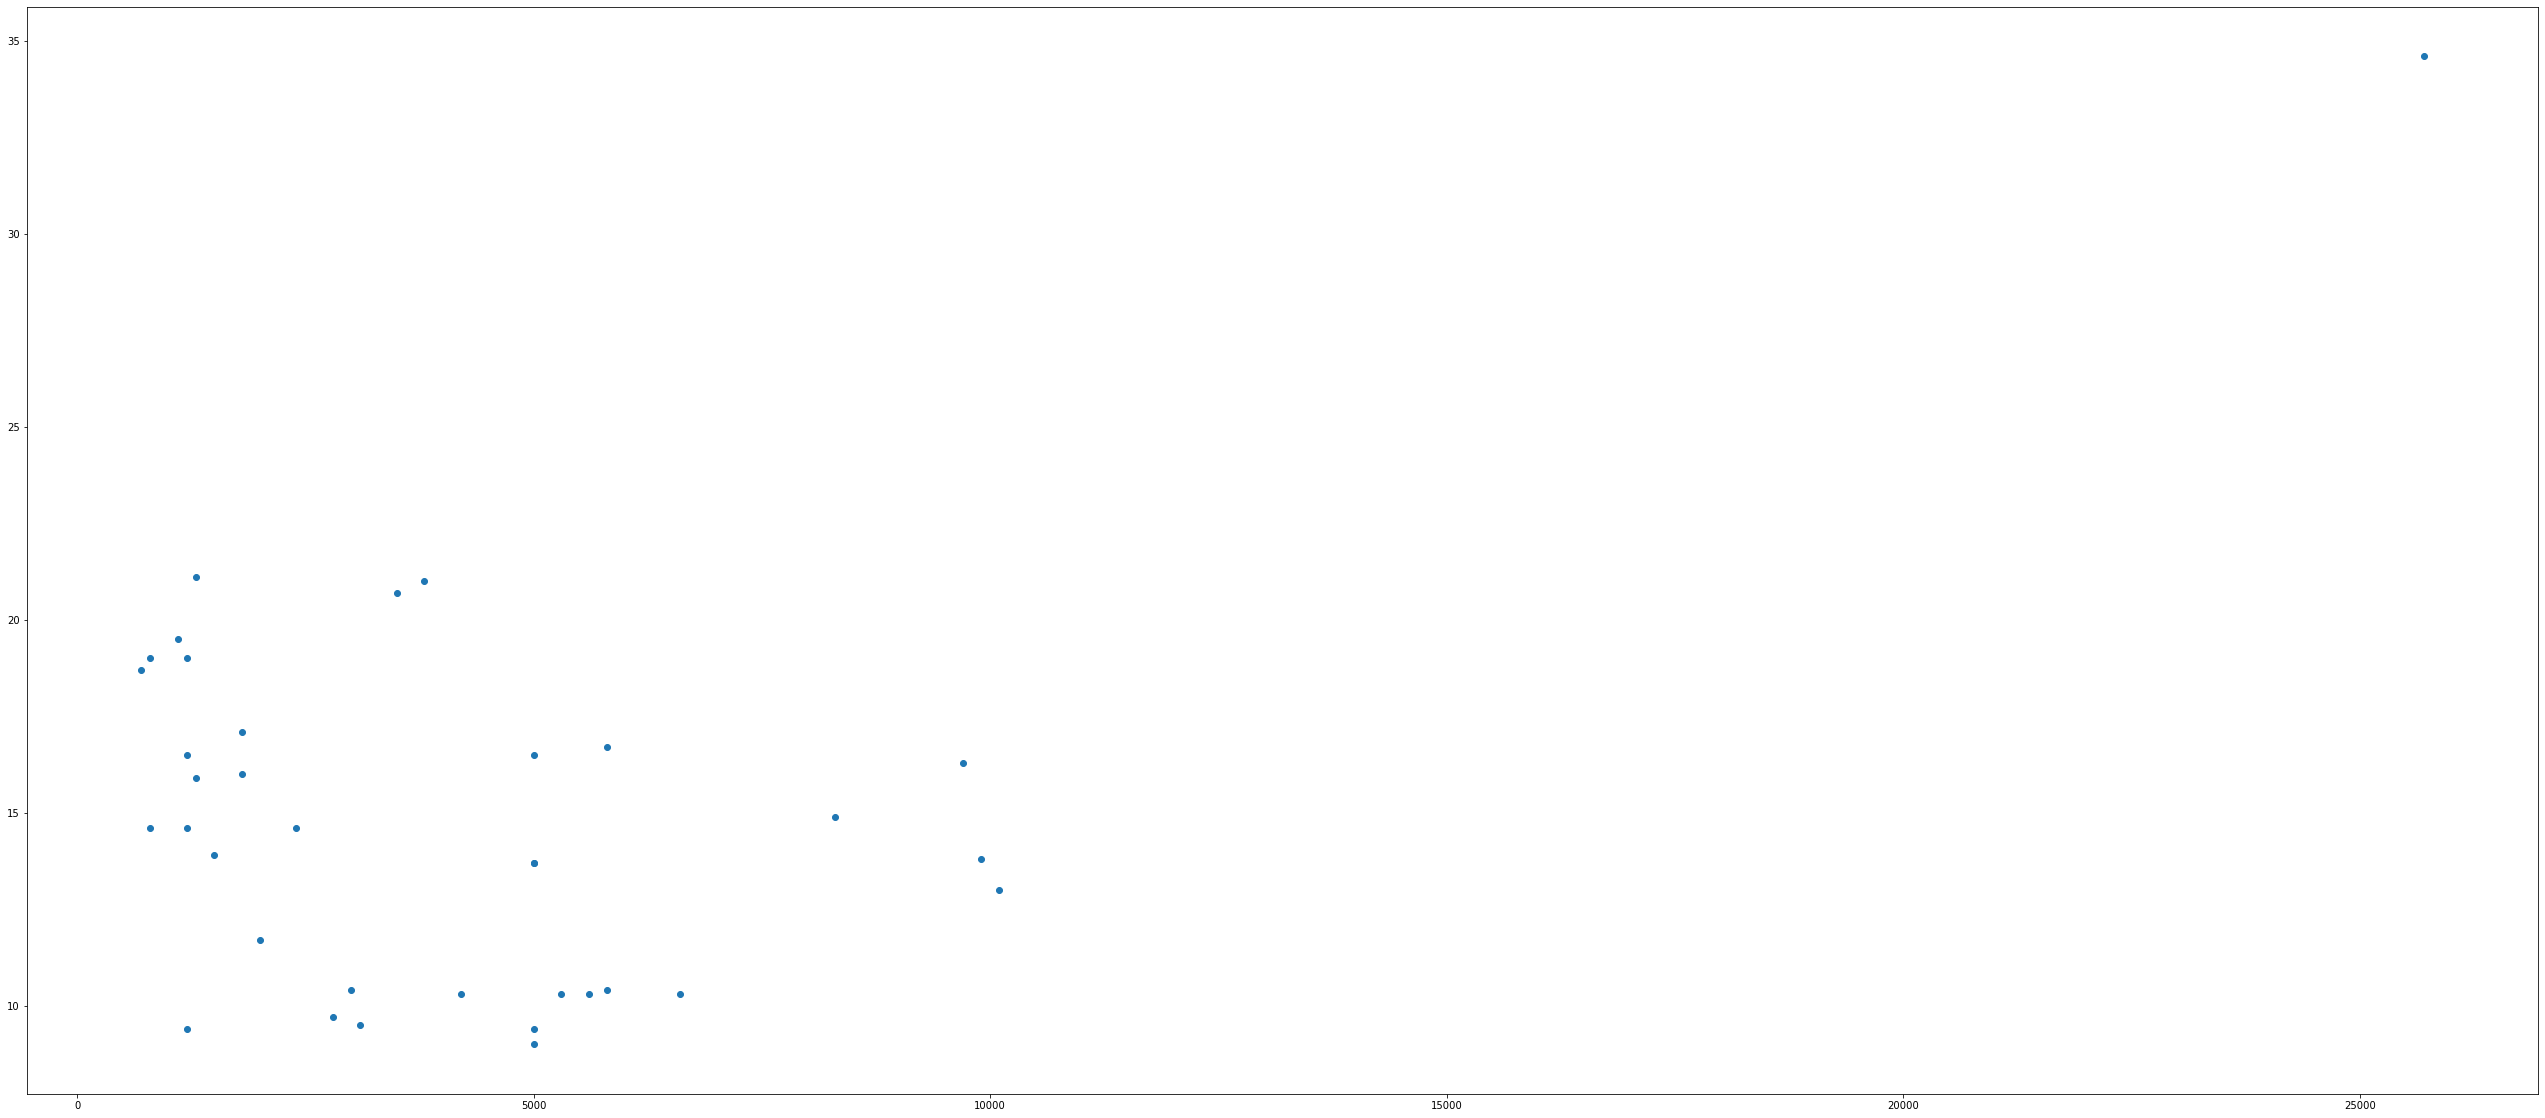

In [77]:
x = df.population_density_by_city_Population_density_by_city
y = df['Footprint_per_capita_(t CO2_cap)']
plt.figure(figsize = (45,20))
plt.scatter(x, y)

In [82]:
alpha, beta = optimize.curve_fit(xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

TypeError: curve_fit() missing 1 required positional argument: 'f'